# Predictive Analytics
# Module 1 - Statistical Foundations
## Demo 2 - Measures of Center

### Use-Case: Predict Future Sales

### Load Data

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("C:\\Users\\anilj\\OneDrive\\Desktop\\ek\\PA\\1.StatisticalFoundations\\dataset\sales_train.csv")

### Calculating Measures of Central Tendency

### Mean: Represents average values

In [8]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


### Median: Middle value of dataset

In [4]:
train.median()

date_block_num      14.0
shop_id             31.0
item_id           9343.0
item_price         399.0
item_cnt_day         1.0
dtype: float64

### Outliers

#### Using Z-Score

In [9]:
from scipy import stats
import numpy as np

In [10]:
# Using Z-score function defined in scipy library to detect the outliers
z = np.abs(stats.zscore(train[['item_price','item_cnt_day']]))
print(z)

[[0.06251983 0.09265226]
 [0.00470966 0.09265226]
 [0.00470966 0.85635092]
 ...
 [0.31324629 0.09265226]
 [0.34215138 0.09265226]
 [0.34215138 0.09265226]]


In [11]:
# Define a threshold to identify an outlier
threshold = 5
print(np.where(z > threshold))

(array([   1701,    2113,    2172, ..., 2935757, 2935758, 2935766],
      dtype=int64), array([0, 0, 0, ..., 1, 1, 1], dtype=int64))


In [8]:
# The first array contains the list of row numbers and second array respective column numbers, 
# which mean z[352][1] have a Z-score higher than 5.
print(z[1701][0])

7.288791540198493


In [9]:
# Printing the sample values for the same
train.iloc[1700:1702]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1700,02.01.2013,0,25,4375,449.0,1.0
1701,03.01.2013,0,25,4384,13499.0,1.0


#### Using IQR

In [10]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [11]:
remove_outlier(train,"item_price").head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


#### Using box plots

In [12]:
%matplotlib inline
import seaborn as sns

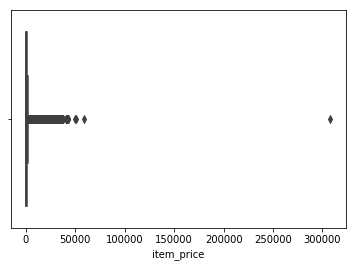

In [13]:
sns.boxplot(x=train['item_price'])

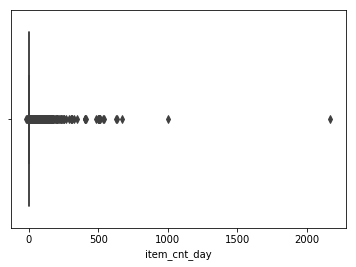

In [14]:
sns.boxplot(x=train['item_cnt_day'])

#### Using scatter plots

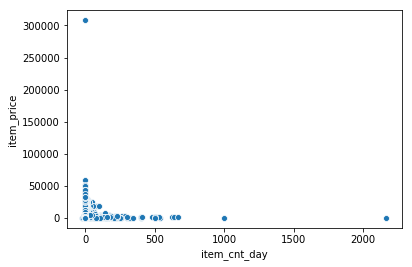

In [15]:
sns.scatterplot(x="item_cnt_day", y="item_price", data=train)

### Mode

In [16]:
train.mode()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,28.12.2013,11,31,20949,299.0,1.0
